In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
category = pd.read_csv('category.csv')
depatment = pd.read_csv('depatment.csv')
goods1 = pd.read_csv('goods1.csv')
goods2 = pd.read_csv('goods2.csv')
record = pd.read_csv('record.csv')

display(category)
display(depatment)
display(goods1)
display(goods2)
display(record)



,id_k,category,persentage
0,1,first_sort,1.0
1,2,second_sort,0.8
2,3,third_sort,0.6


,id_d,name_d
0,1,vegetables
1,2,fruits
2,3,else


,id_t,name_p,price
0,1,chocolate,10
1,2,bread,8
2,3,tomatoes,12


,id_t,name_p,price
0,4,cucumber,14
1,5,carrot,9
2,6,apple,15
3,7,banana,25
4,8,orange,20


,date,id_t,id_k,id_d
0,2024-01-12,1,2,3
1,2024-01-12,3,1,1
2,2024-01-12,2,3,3
3,2024-01-13,7,2,2
4,2024-01-13,5,1,1
5,2024-01-14,1,1,3
6,2024-01-15,2,2,3


In [3]:
goods = pd.concat([goods1,goods2], ignore_index=True)
print(goods)

   id_t     name_p  price
0     1  chocolate     10
1     2      bread      8
2     3   tomatoes     12
3     4   cucumber     14
4     5     carrot      9
5     6      apple     15
6     7     banana     25
7     8     orange     20


In [4]:
data = pd.merge(record, goods, on='id_t', how='inner')
data = pd.merge(data, category, on='id_k', how='inner')
data = pd.merge(data, depatment, on='id_d', how='inner')

display(data)

,date,id_t,id_k,id_d,name_p,price,category,persentage,name_d
0,2024-01-12,1,2,3,chocolate,10,second_sort,0.8,else
1,2024-01-12,3,1,1,tomatoes,12,first_sort,1.0,vegetables
2,2024-01-12,2,3,3,bread,8,third_sort,0.6,else
3,2024-01-13,7,2,2,banana,25,second_sort,0.8,fruits
4,2024-01-13,5,1,1,carrot,9,first_sort,1.0,vegetables
5,2024-01-14,1,1,3,chocolate,10,first_sort,1.0,else
6,2024-01-15,2,2,3,bread,8,second_sort,0.8,else


In [5]:
data['total'] = data['persentage'] * data['price']
display(data)

,date,id_t,id_k,id_d,name_p,price,category,persentage,name_d,total
0,2024-01-12,1,2,3,chocolate,10,second_sort,0.8,else,8.0
1,2024-01-12,3,1,1,tomatoes,12,first_sort,1.0,vegetables,12.0
2,2024-01-12,2,3,3,bread,8,third_sort,0.6,else,4.8
3,2024-01-13,7,2,2,banana,25,second_sort,0.8,fruits,20.0
4,2024-01-13,5,1,1,carrot,9,first_sort,1.0,vegetables,9.0
5,2024-01-14,1,1,3,chocolate,10,first_sort,1.0,else,10.0
6,2024-01-15,2,2,3,bread,8,second_sort,0.8,else,6.4


In [6]:
def summ_by_depatment():
    filtred = data.groupby('name_d')['total'].sum().reset_index()
    return filtred
display(summ_by_depatment())


,name_d,total
0,else,29.2
1,fruits,20.0
2,vegetables,21.0


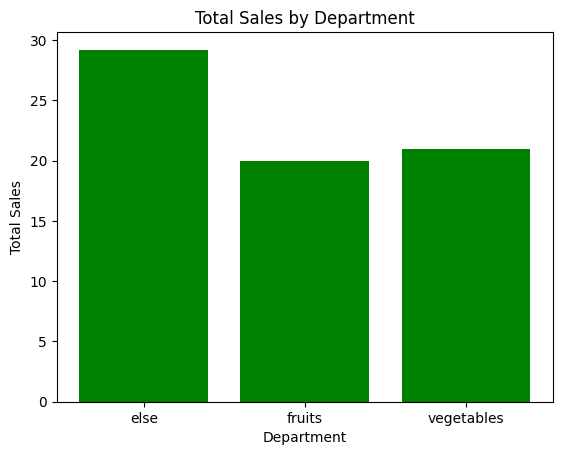

In [7]:
def bar_graph():
    result = summ_by_depatment()
    plt.bar(result['name_d'],result['total'], color='green')
    plt.xlabel('Department')
    plt.ylabel('Total Sales')
    plt.title('Total Sales by Department')
    plt.show()

bar_graph()

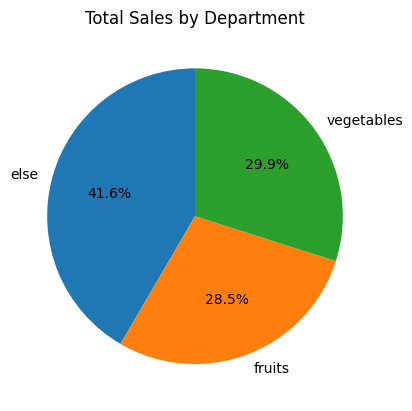

In [8]:
def circle_graph():
    result = summ_by_depatment()
    labels = result['name_d']
    sizes = result['total']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Total Sales by Department')
    plt.show()
circle_graph()

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
start_date = widgets.DatePicker(
    description = 'Pick start date',
    value = data['date'].min()
)

end_date = widgets.DatePicker(
    description = 'Pick end date',
    value = data['date'].max()
)

In [11]:
def everyday_goods(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    filt = (data['date'] >= start_date) & (data['date'] <= end_date)
    
    filtered_df = data[filt]

    result = filtered_df.groupby('name_p')['total'].sum().reset_index()

    display(result)


In [12]:
w = widgets.interactive(everyday_goods, start_date=start_date, end_date=end_date)
display(w)

interactive(children=(DatePicker(value=Timestamp('2024-01-12 00:00:00'), description='Pick start date', step=1…

In [24]:
wd = widgets.Dropdown(
    options=data['category'].unique(),
    value=data['category'].iloc[1],
    description='Назва Цеху',
    disabled=False
)
def show(value):
    if value in data['category'].values:
        filtred = data[data['category']==value]
        filtred = filtred.groupby('name_p')['total'].sum().reset_index()
        filtred = filtred.sort_values(by='total', ascending=False)
        
        display(filtred.iloc[0])

        display(filtred[['name_p','total']])

widget = widgets.interactive(show,value=wd)

display(widget)


interactive(children=(Dropdown(description='Назва Цеху', index=1, options=('second_sort', 'first_sort', 'third…

In [15]:
df = pd.read_csv('depatment.csv')

class Depatment:
    def __init__(self,id ,name):
        self._id = id
        self._name = name
    
    @property
    def id(self):
        return self._id
    
    @property
    def name(self):
        return self._name
    
    @id.setter
    def id(self, value):
        self._id = value
    
    @name.setter
    def name(self, value):
        self._name = value

depatment = [Depatment(row['id_d'],row['name_d']) for _,row in df.iterrows()]

for d in depatment:
    print(f'ID: {d.id}, Name: {d.name}')


ID: 1, Name: vegetables
ID: 2, Name: fruits
ID: 3, Name: else


In [25]:
import unittest

class TestDepatment(unittest.TestCase):
    def setUp(self):
        self.d1 = Depatment(1, 'milk')
    
    def test_id(self):
        self.assertEqual(self.d1.id, 1)
    
    def test_name(self):
        self.assertEqual(self.d1.name, 'milk')
    
    def test_set_id(self):
        self.d1.id = 2
        self.assertEqual(self.d1.id, 2)
    
    def test_set_name(self):
        self.d1.name = 'paper'
        self.assertEqual(self.d1.name, 'paper')

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)



....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK
